In [1]:

# # Projeto de Visão Computacional com YOLOv5
# ## FarmTech Solutions - Detecção de Garrafas e Latas
#
# **Autor:** [Seu Nome Completo]
# **RM:** [Seu RM]
# **Data:** Outubro/2025
#
# ---
#
# ## 📋 Índice
# 1. Configuração do Ambiente
# 2. Preparação do Dataset
# 3. Treinamento do Modelo (30 épocas)
# 4. Treinamento do Modelo (60 épocas)
# 5. Validação dos Modelos
# 6. Testes e Resultados
# 7. Análise Comparativa
# 8. Conclusões
#
# ---
#
# ## 1. Configuração do Ambiente

# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Clonar repositório YOLOv5
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

# Importar bibliotecas necessárias
import torch
import os
from IPython.display import Image, display
import matplotlib.pyplot as plt
import numpy as np

# Verificar GPU disponível
print(f'Torch version: {torch.__version__}')
print(f'CUDA disponível: {torch.cuda.is_available()}')
print(f'GPU: {torch.cuda.get_device_name(0) if torch.cuda.is_available() else "CPU"}')

Mounted at /content/drive
Cloning into 'yolov5'...
remote: Enumerating objects: 17611, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 17611 (delta 8), reused 2 (delta 2), pack-reused 17595 (from 3)
Receiving objects: 100% (17611/17611), 16.86 MiB | 17.00 MiB/s, done.
Resolving deltas: 100% (11992/11992), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 55.8 MB/s eta 0:00:00
Torch version: 2.8.0+cu126
CUDA disponível: True
GPU: Tesla T4


In [2]:
# ---
#
# ## 2. Preparação do Dataset
#
# ### 2.1 Estrutura do Dataset
#
# O dataset foi organizado seguindo a estrutura:
# - **Train:** 64 imagens (32 garrafas + 32 latas)
# - **Valid:** 8 imagens (4 garrafas + 4 latas)
# - **Test:** 8 imagens (4 garrafas + 4 latas)
#
# ### 2.2 Rotulação
#
# As imagens foram rotuladas usando **Make Sense AI** com as seguintes classes:
# - Classe 0: garrafa
# - Classe 1: lata

# Definir caminho do dataset no Google Drive
dataset_path = '/content/drive/MyDrive/fiap/YOLOv5_Project'

# Criar arquivo dataset.yaml
dataset_yaml_content = f"""
train: {dataset_path}/dataset/train/images
val: {dataset_path}/dataset/valid/images

nc: 2  # número de classes
names: ['garrafa', 'lata']  # nomes das classes
"""

# Salvar o arquivo dataset.yaml
with open(f'{dataset_path}/dataset.yaml', 'w') as f:
    f.write(dataset_yaml_content)

print("✅ Arquivo dataset.yaml criado com sucesso!")

# Verificar estrutura do dataset
print("\n📁 Estrutura do Dataset:")
for split in ['train', 'valid', 'test']:
    img_path = f'{dataset_path}/dataset/{split}/images'
    lbl_path = f'{dataset_path}/dataset/{split}/labels'

    if os.path.exists(img_path):
        num_images = len([f for f in os.listdir(img_path) if f.endswith(('.jpg', '.png', '.jpeg'))])
        num_labels = len([f for f in os.listdir(lbl_path) if f.endswith('.txt')]) if os.path.exists(lbl_path) else 0
        print(f"{split.capitalize()}: {num_images} imagens, {num_labels} labels")

✅ Arquivo dataset.yaml criado com sucesso!

📁 Estrutura do Dataset:
Train: 64 imagens, 64 labels
Valid: 8 imagens, 8 labels
Test: 8 imagens, 8 labels


wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-10-18 01:36:37.667348: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760751397.692493    3693 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760751397.699761    3693 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1760751397.718442    3693 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1760751397.718494    3693 computation_placer.cc:177] computation placer already registere

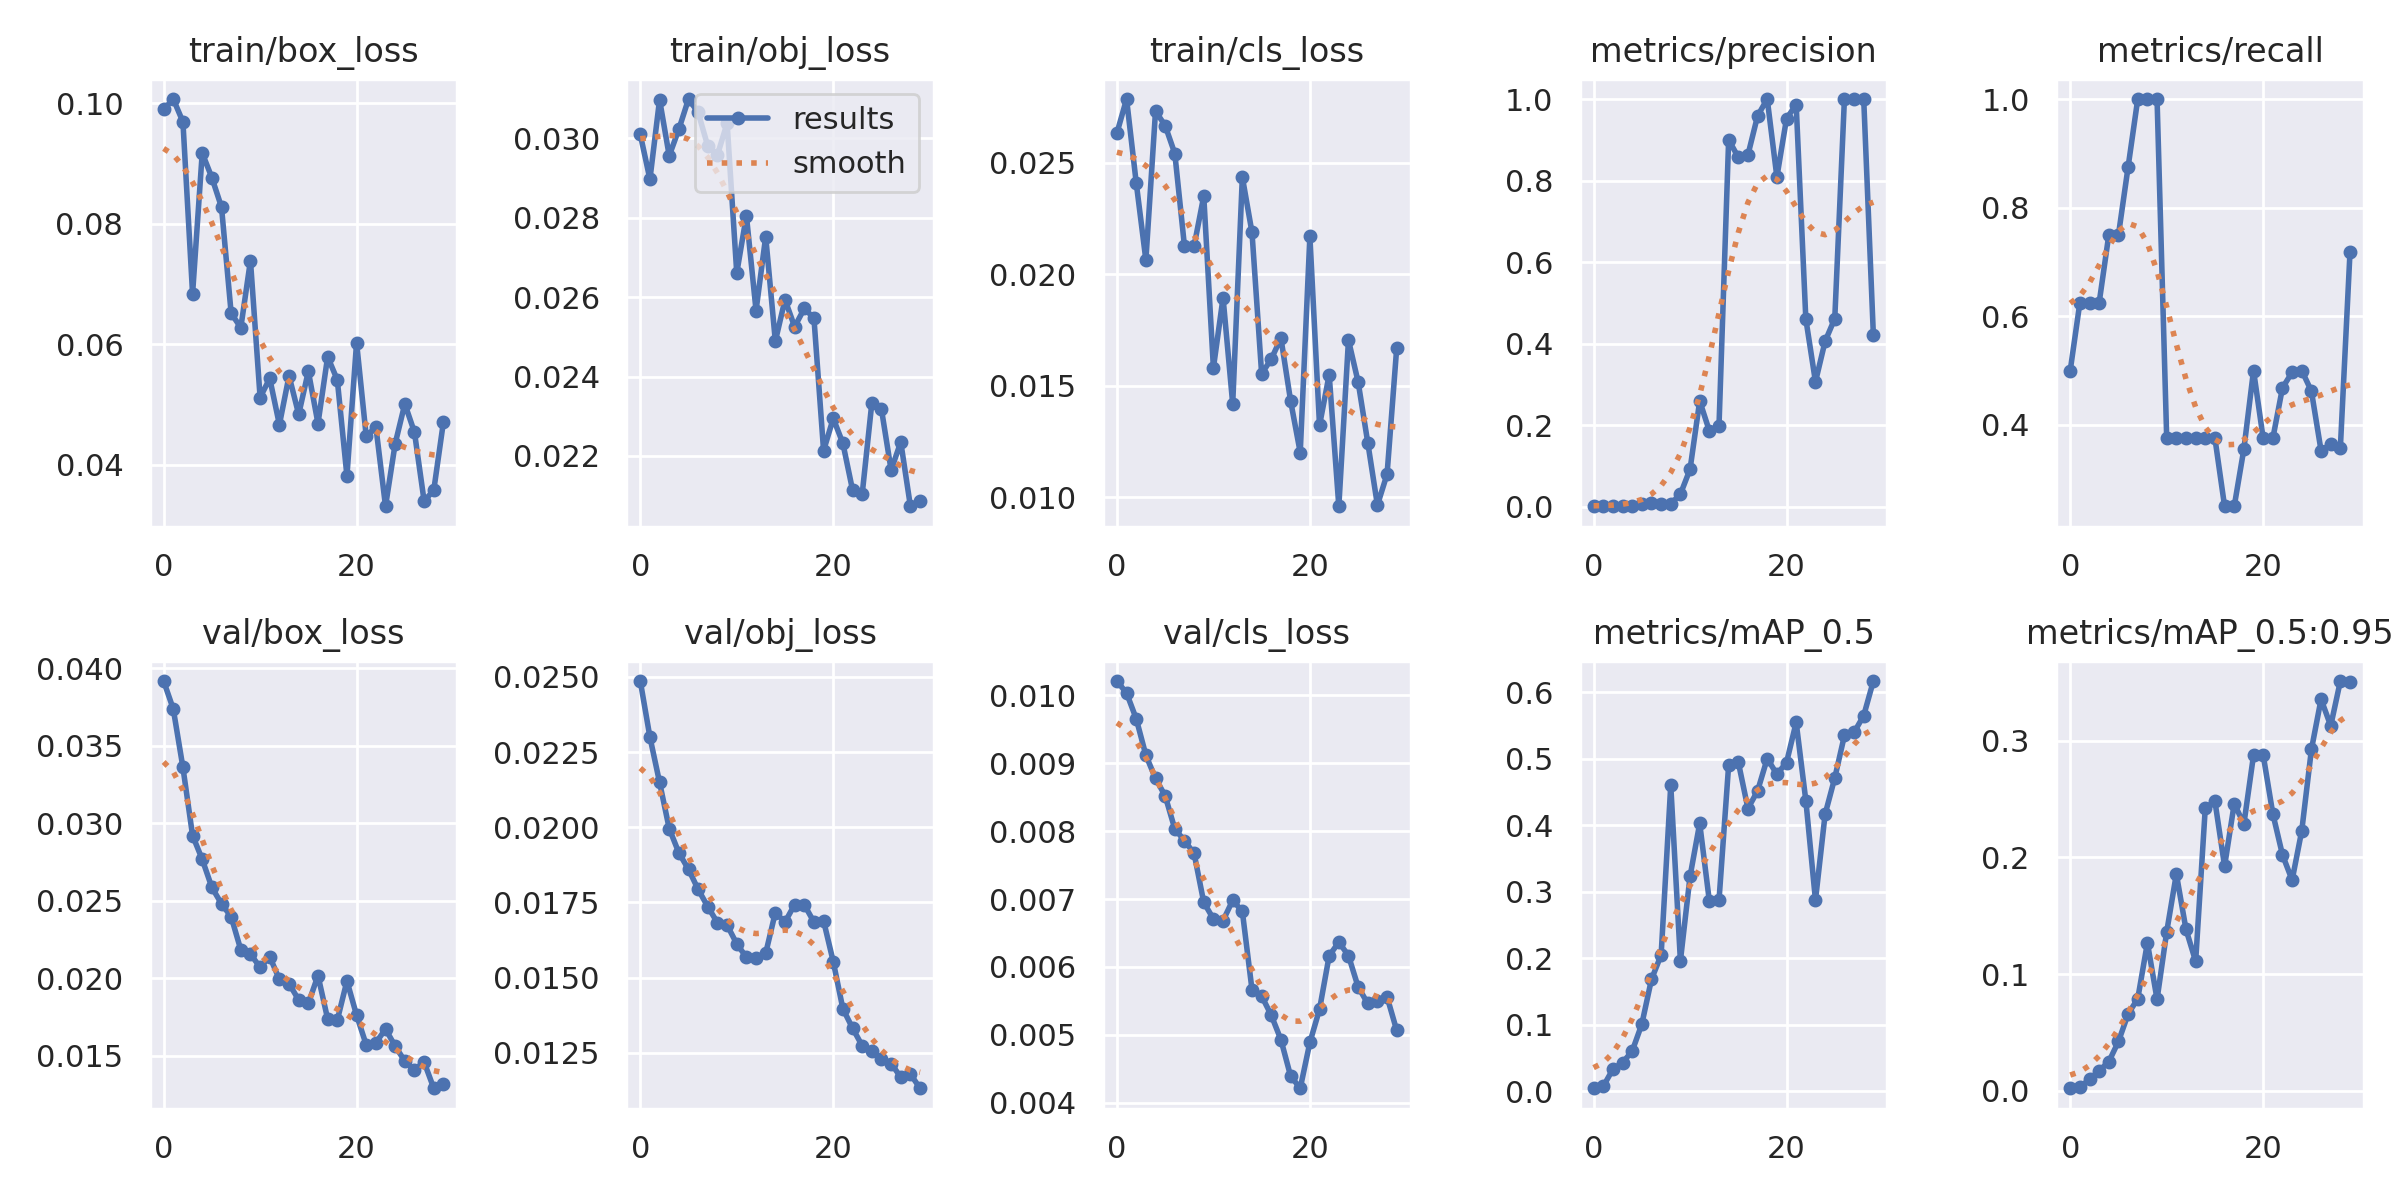


📈 Matriz de Confusão (30 épocas):


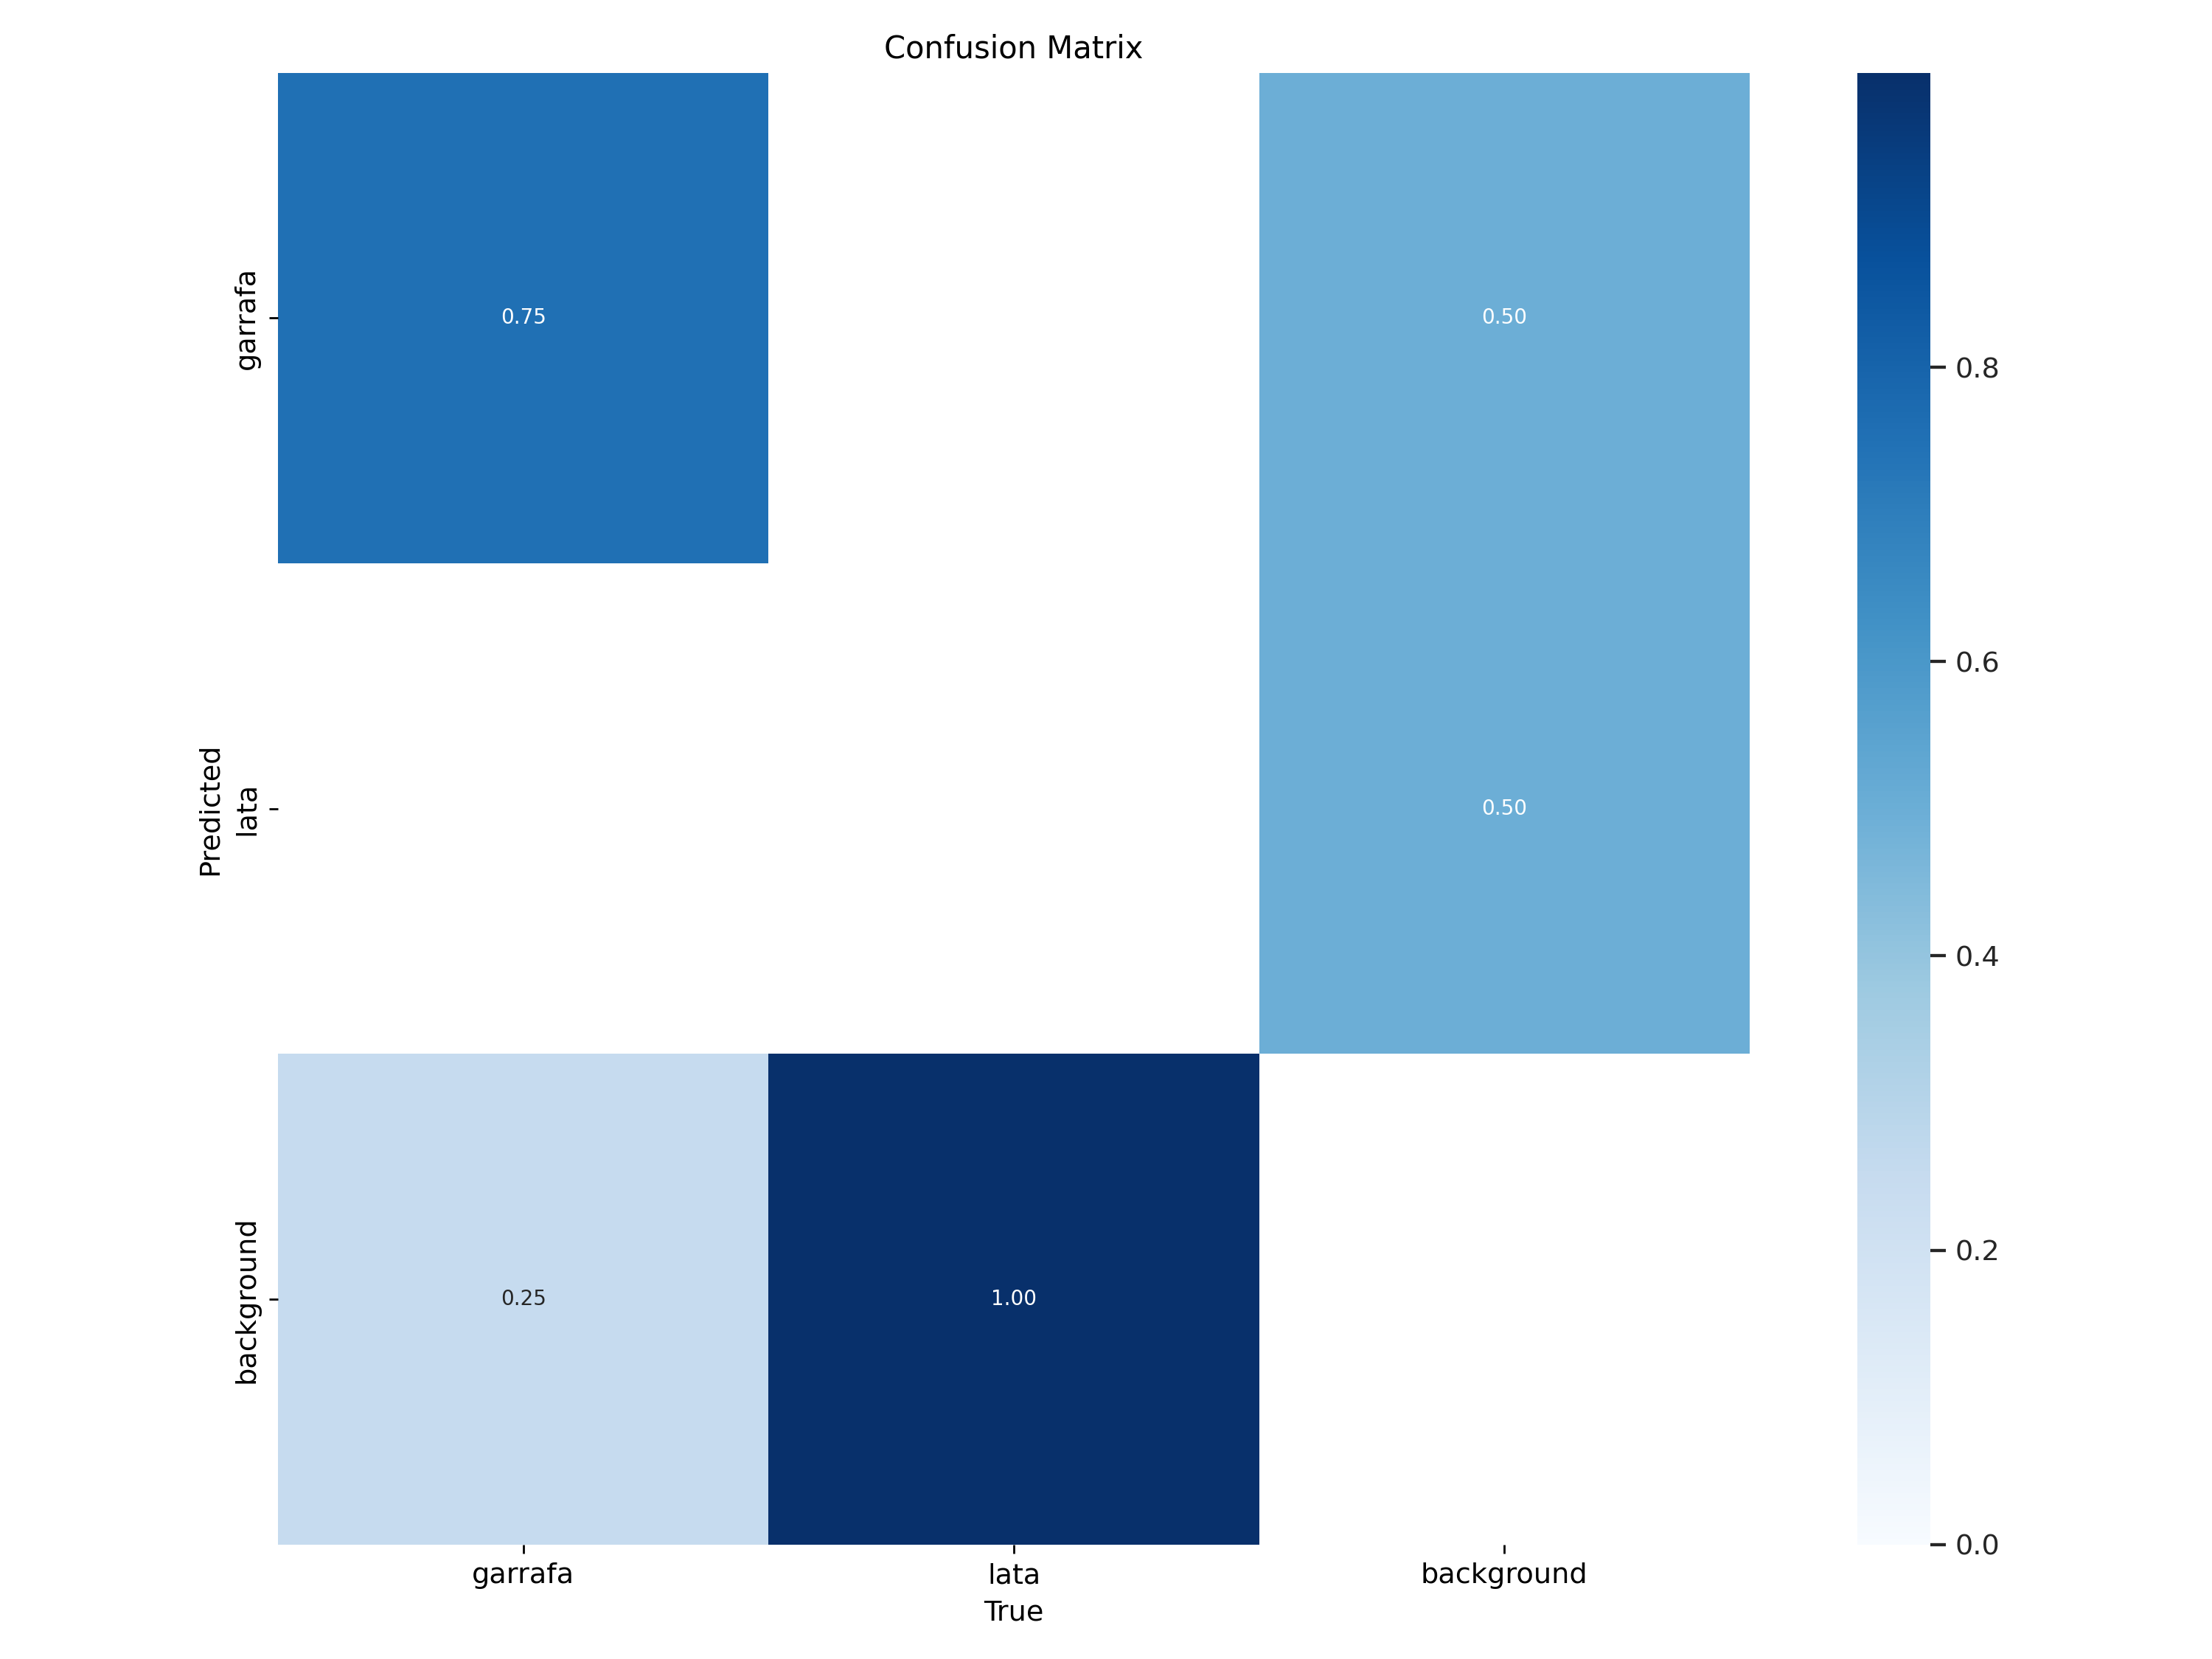

In [5]:
# ---
#
# ## 3. Treinamento do Modelo - 30 Épocas
#
# Nesta etapa, realizamos o primeiro treinamento com **30 épocas** para avaliar o desempenho inicial do modelo.

# Treinamento com 30 épocas
!python train.py \
    --img 640 \
    --batch 16 \
    --epochs 30 \
    --data {dataset_path}/dataset.yaml \
    --weights yolov5s.pt \
    --cache \
    --name exp_30epochs \
    --project {dataset_path}/runs/train

print("\n✅ Treinamento de 30 épocas concluído!")

# Visualizar resultados do treinamento
print("\n📊 Resultados do Treinamento (30 épocas):")
display(Image(filename=f'{dataset_path}/runs/train/exp_30epochs/results.png', width=800))

print("\n📈 Matriz de Confusão (30 épocas):")
display(Image(filename=f'{dataset_path}/runs/train/exp_30epochs/confusion_matrix.png', width=600))

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-10-18 01:40:10.789171: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760751610.815164    4688 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760751610.822815    4688 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1760751610.842230    4688 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1760751610.842285    4688 computation_placer.cc:177] computation placer already registere

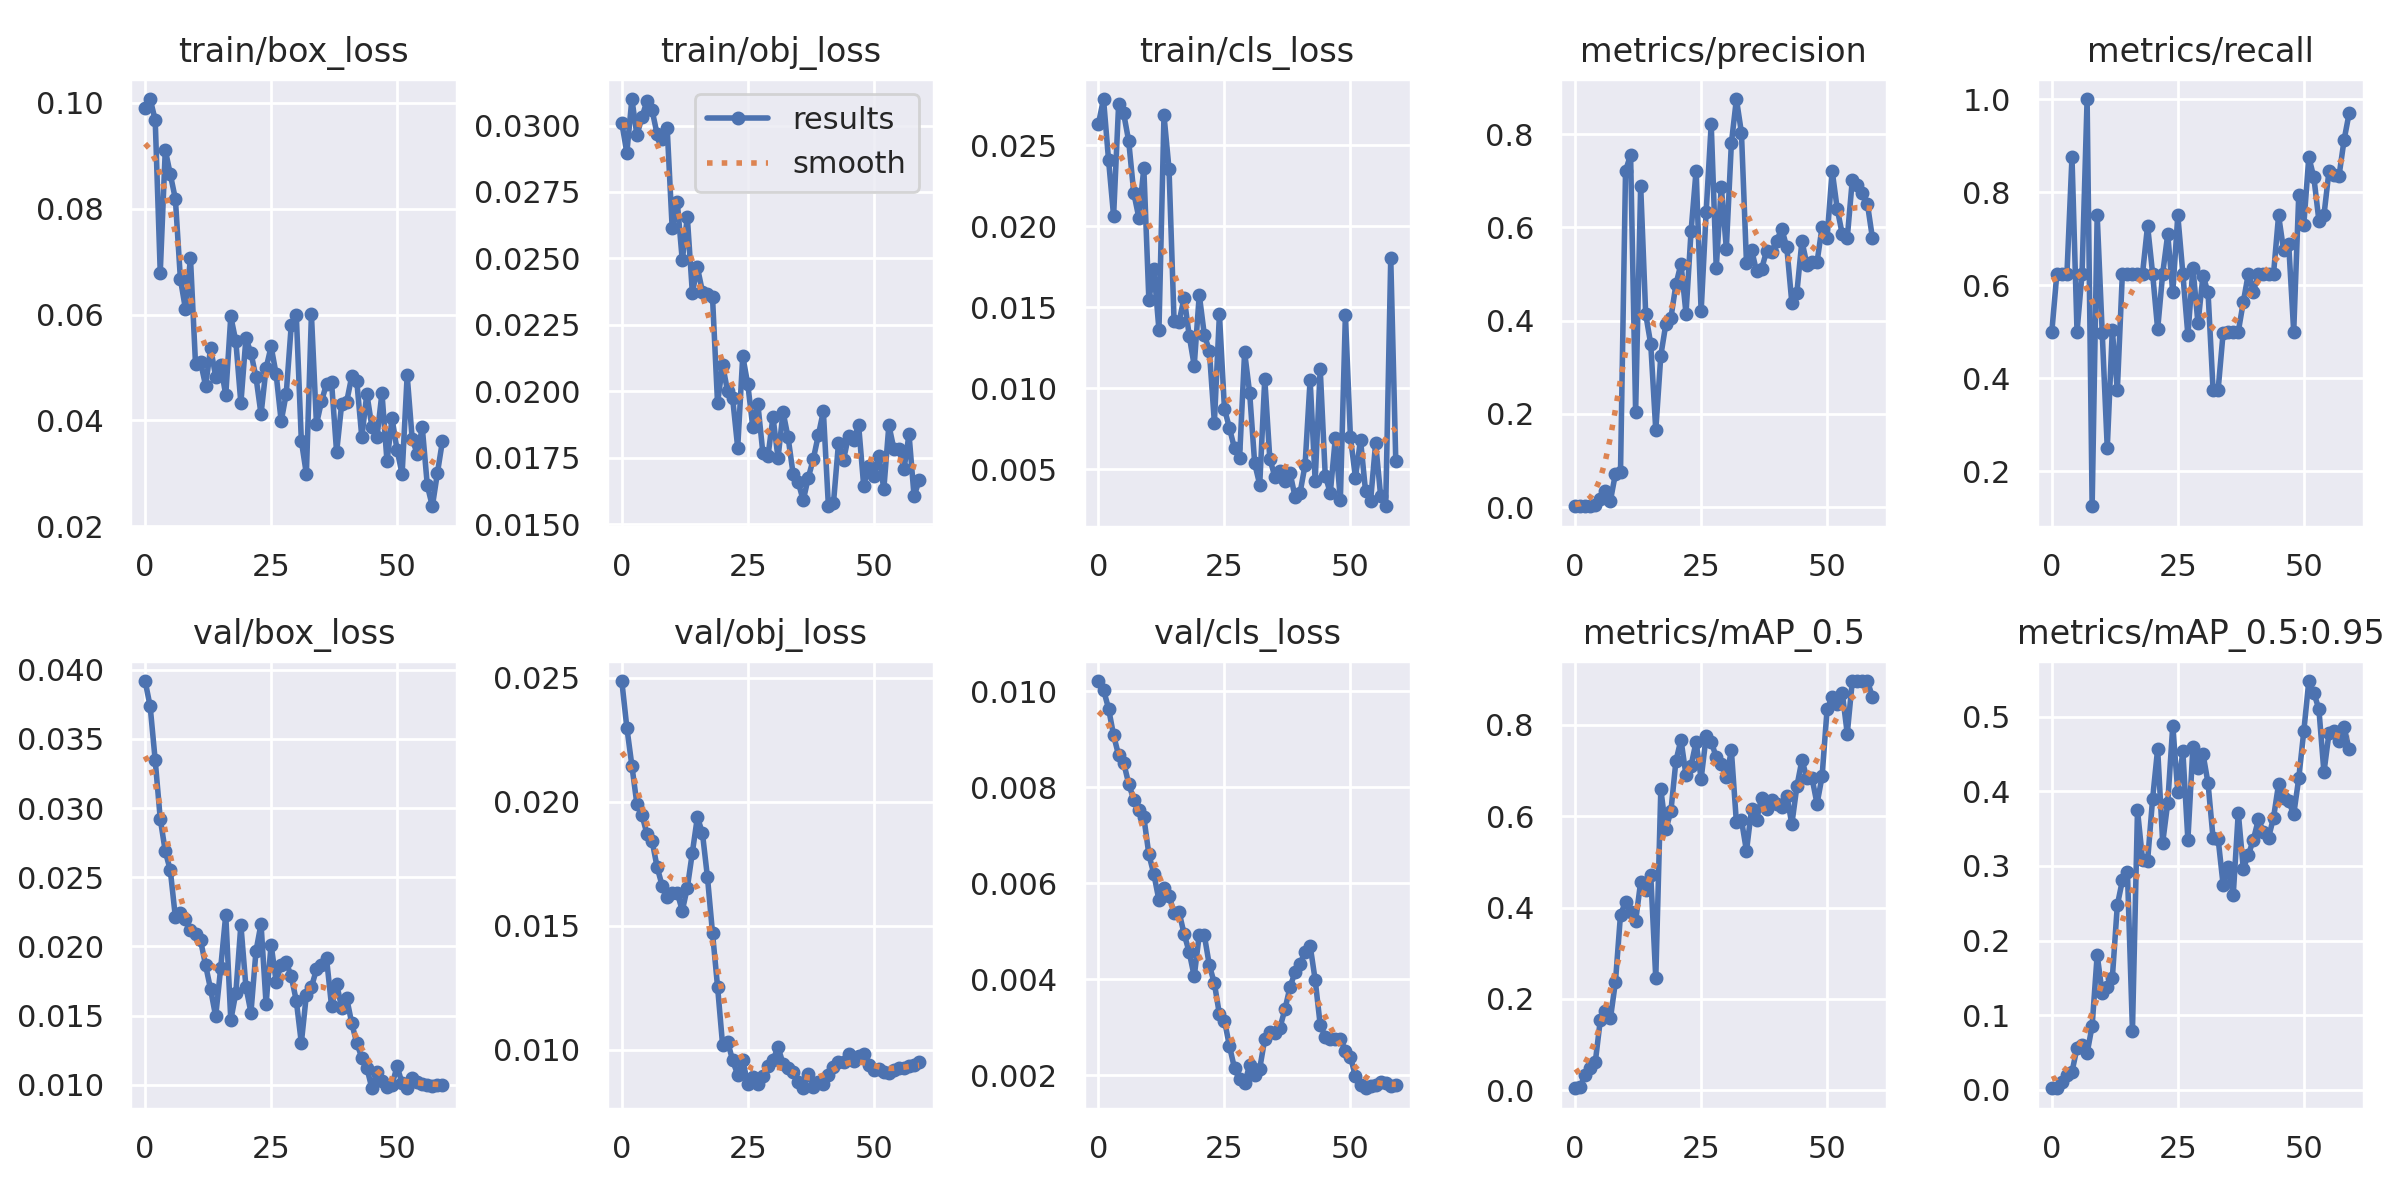


 Matriz de Confusão (60 épocas):


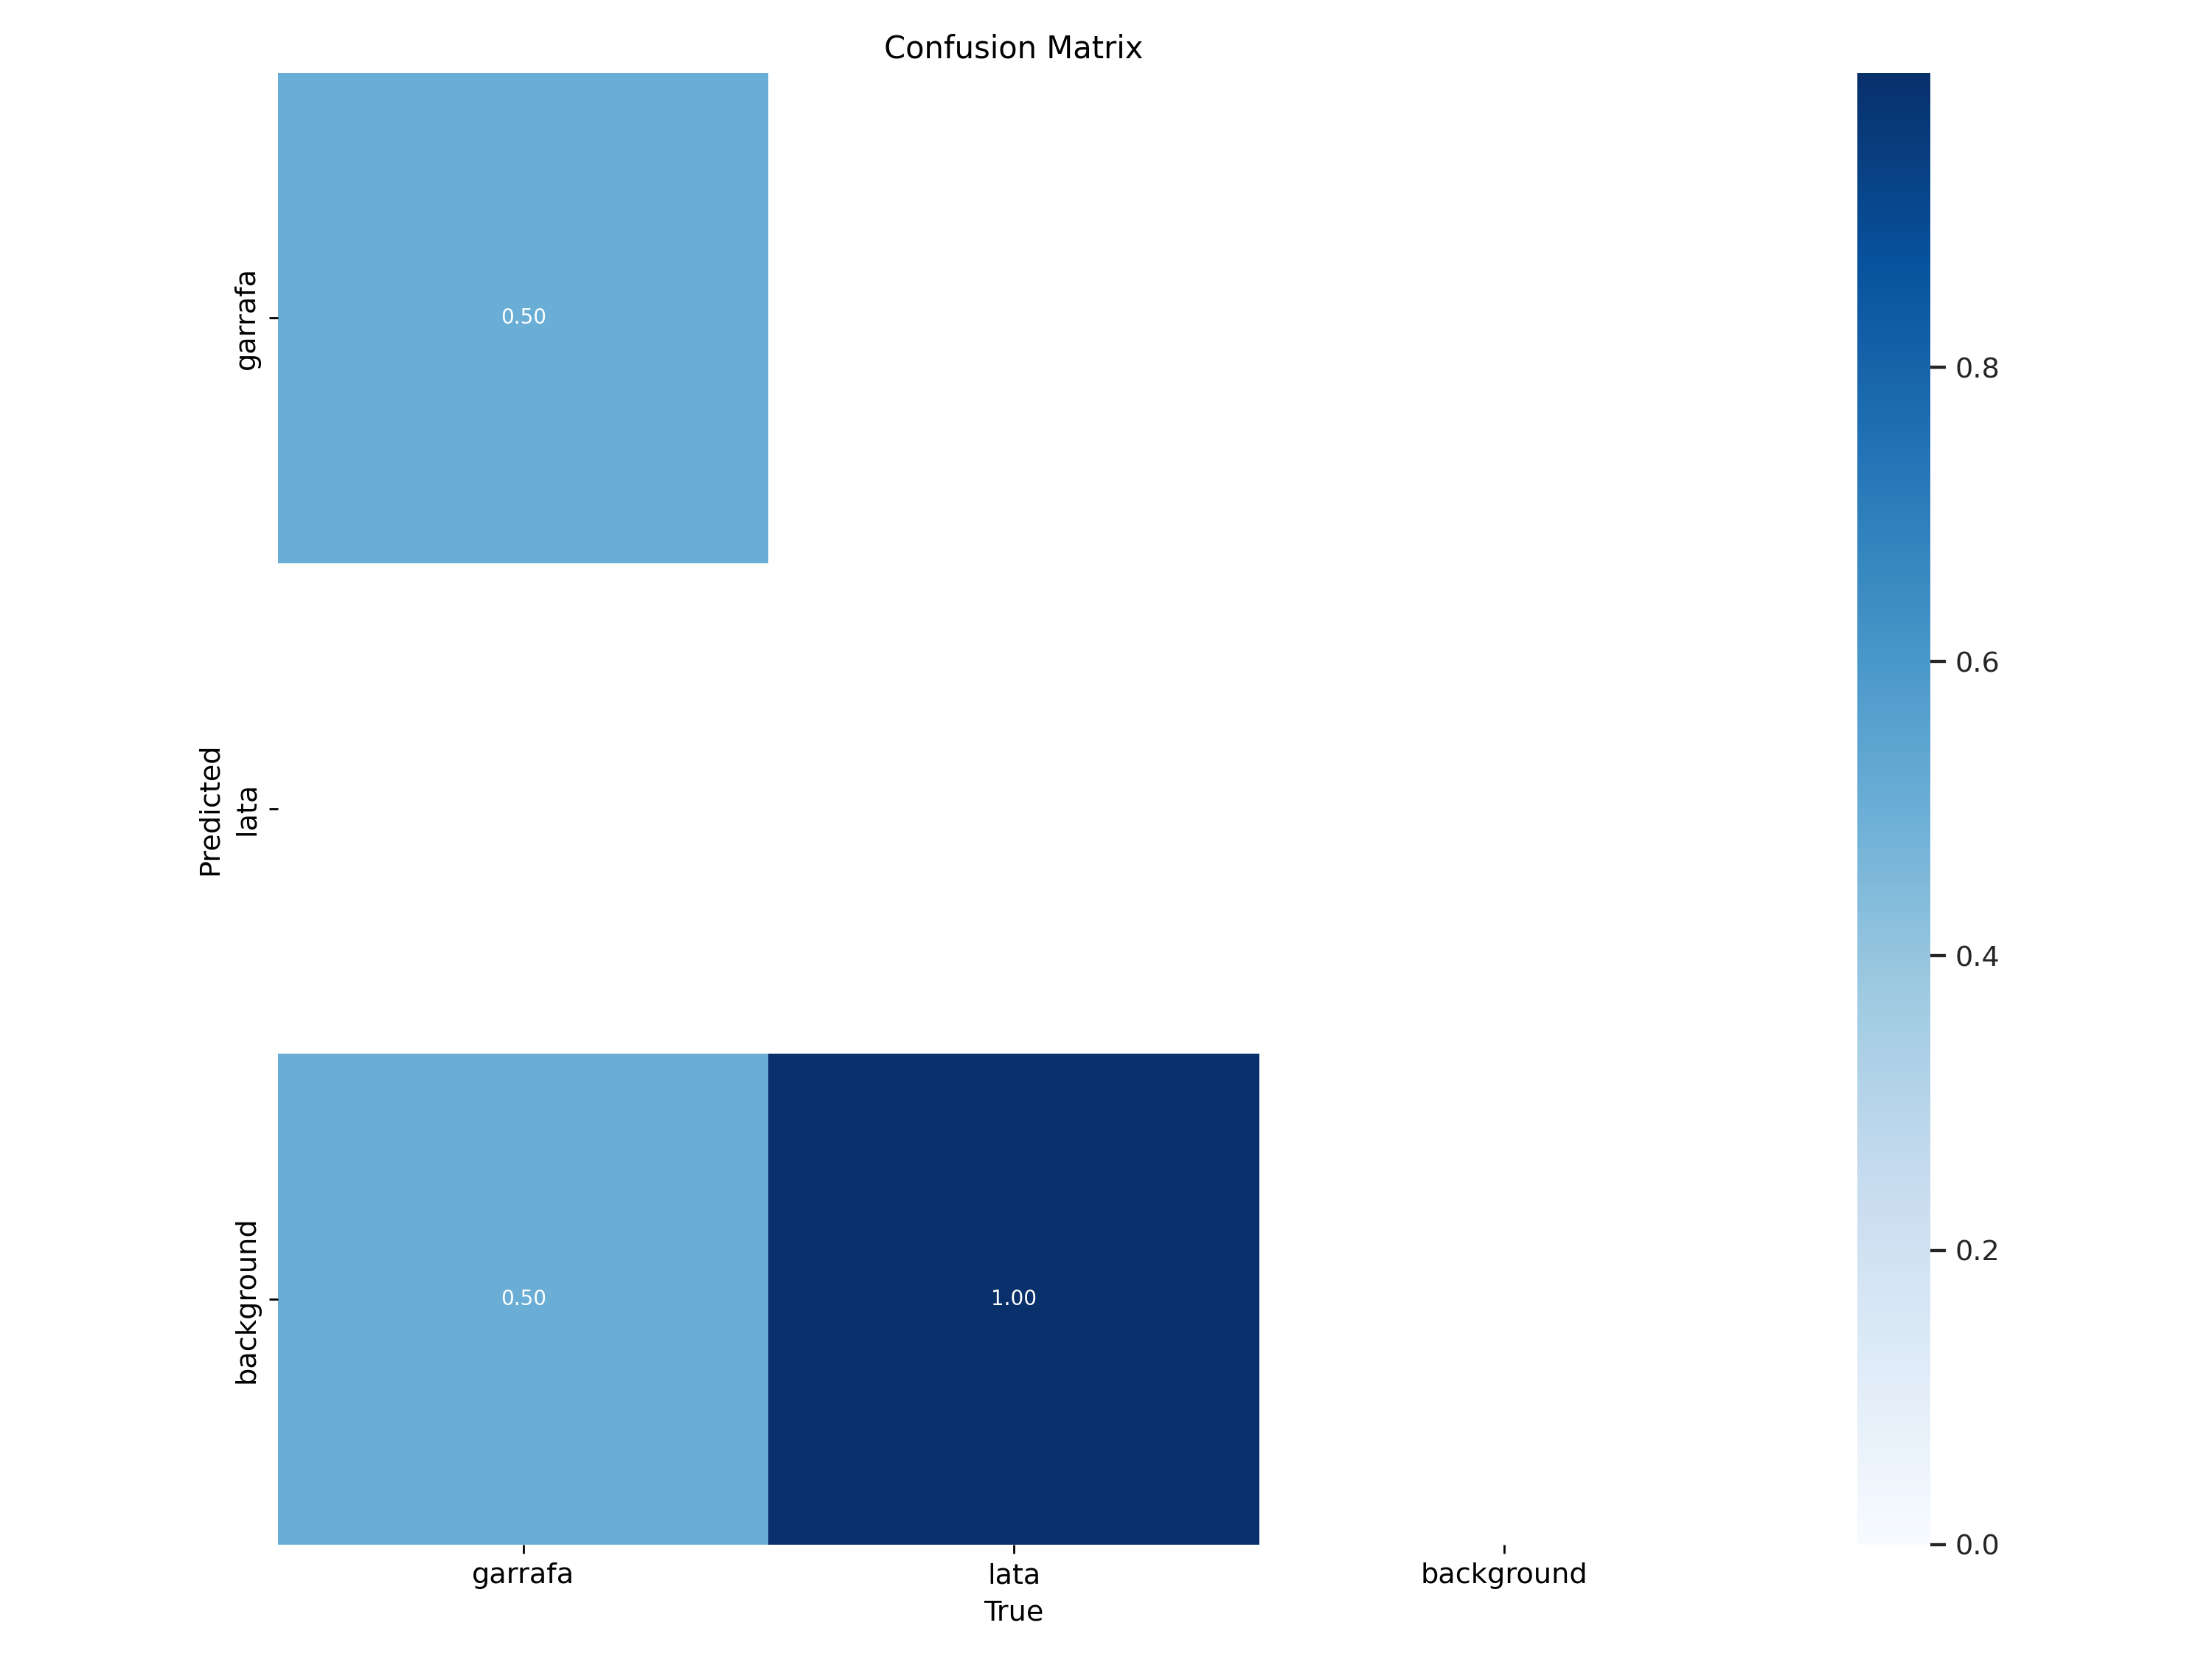

In [6]:
# ---
#
# ## 4. Treinamento do Modelo - 60 Épocas
#
# Agora, realizamos um segundo treinamento com **60 épocas** para comparar o impacto do aumento de iterações.

# Treinamento com 60 épocas
!python train.py \
    --img 640 \
    --batch 16 \
    --epochs 60 \
    --data {dataset_path}/dataset.yaml \
    --weights yolov5s.pt \
    --cache \
    --name exp_60epochs \
    --project {dataset_path}/runs/train

print("\n✅ Treinamento de 60 épocas concluído!")

# Visualizar resultados do treinamento
print("\n Resultados do Treinamento (60 épocas):")
display(Image(filename=f'{dataset_path}/runs/train/exp_60epochs/results.png', width=800))

print("\n Matriz de Confusão (60 épocas):")
display(Image(filename=f'{dataset_path}/runs/train/exp_60epochs/confusion_matrix.png', width=600))

In [7]:
# ---
#
# ## 5. Validação dos Modelos
#
# Validar ambos os modelos com o conjunto de validação.

# Validação do modelo 30 épocas
print("🔍 Validando modelo de 30 épocas...")
!python val.py \
    --data {dataset_path}/dataset.yaml \
    --weights {dataset_path}/runs/train/exp_30epochs/weights/best.pt \
    --img 640 \
    --name val_30epochs \
    --project {dataset_path}/runs/val

# Validação do modelo 60 épocas
print("\n🔍 Validando modelo de 60 épocas...")
!python val.py \
    --data {dataset_path}/dataset.yaml \
    --weights {dataset_path}/runs/train/exp_60epochs/weights/best.pt \
    --img 640 \
    --name val_60epochs \
    --project {dataset_path}/runs/val

print("\n✅ Validações concluídas!")

🔍 Validando modelo de 30 épocas...
val: data=/content/drive/MyDrive/fiap/YOLOv5_Project/dataset.yaml, weights=['/content/drive/MyDrive/fiap/YOLOv5_Project/runs/train/exp_30epochs/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=/content/drive/MyDrive/fiap/YOLOv5_Project/runs/val, name=val_30epochs, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-441-g15c0127a Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/drive/MyDrive/fiap/YOLOv5_Project/dataset/valid/labels.cache... 8 images, 0 backgrounds, 0 corrupt: 100% 8/8 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 1/1 [00:00<00:00,  1.17it/s]
            

🎯 Testando modelo de 30 épocas...
detect: weights=['/content/drive/MyDrive/fiap/YOLOv5_Project/runs/train/exp_30epochs/weights/best.pt'], source=/content/drive/MyDrive/fiap/YOLOv5_Project/dataset/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/drive/MyDrive/fiap/YOLOv5_Project/runs/detect, name=test_30epochs, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-441-g15c0127a Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/8 /content/drive/MyDrive/fiap/YOLOv5_Project/dataset/test/images/apple-3144234_1280.jpg: 384x640 (no detections), 71.1ms
image

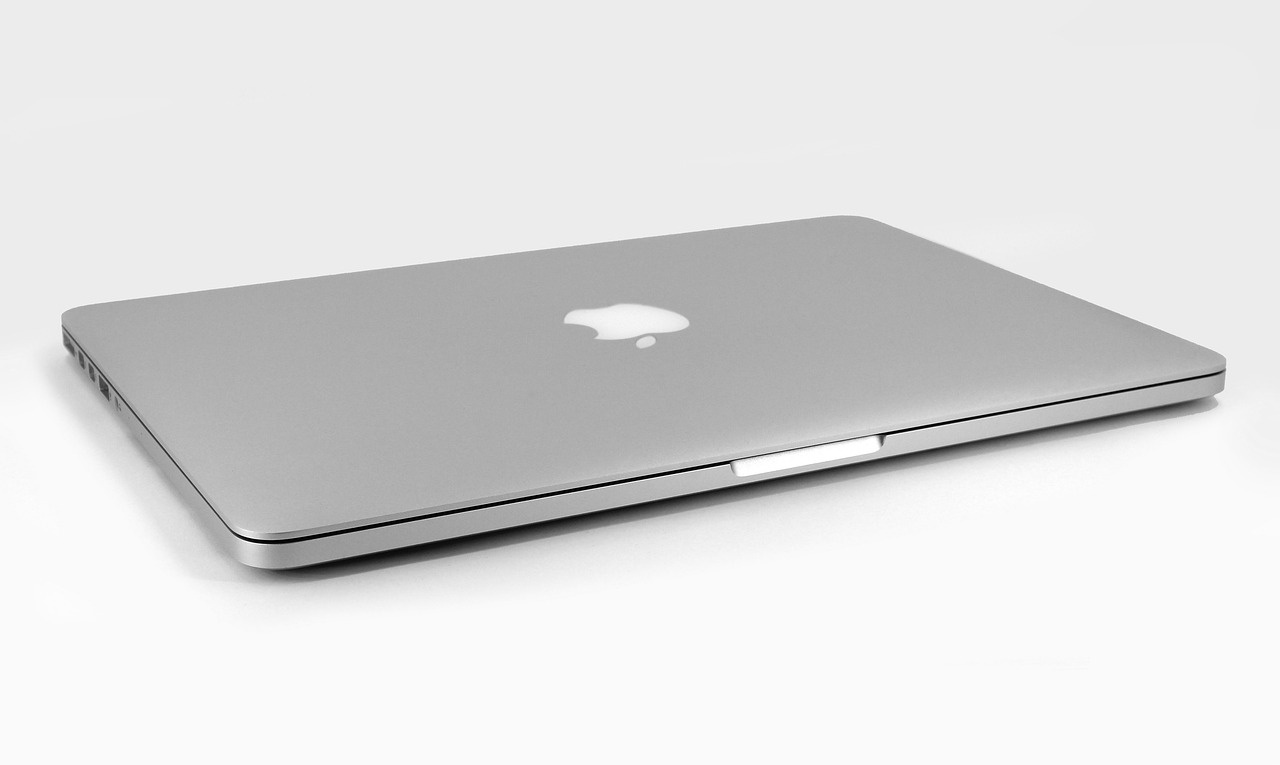

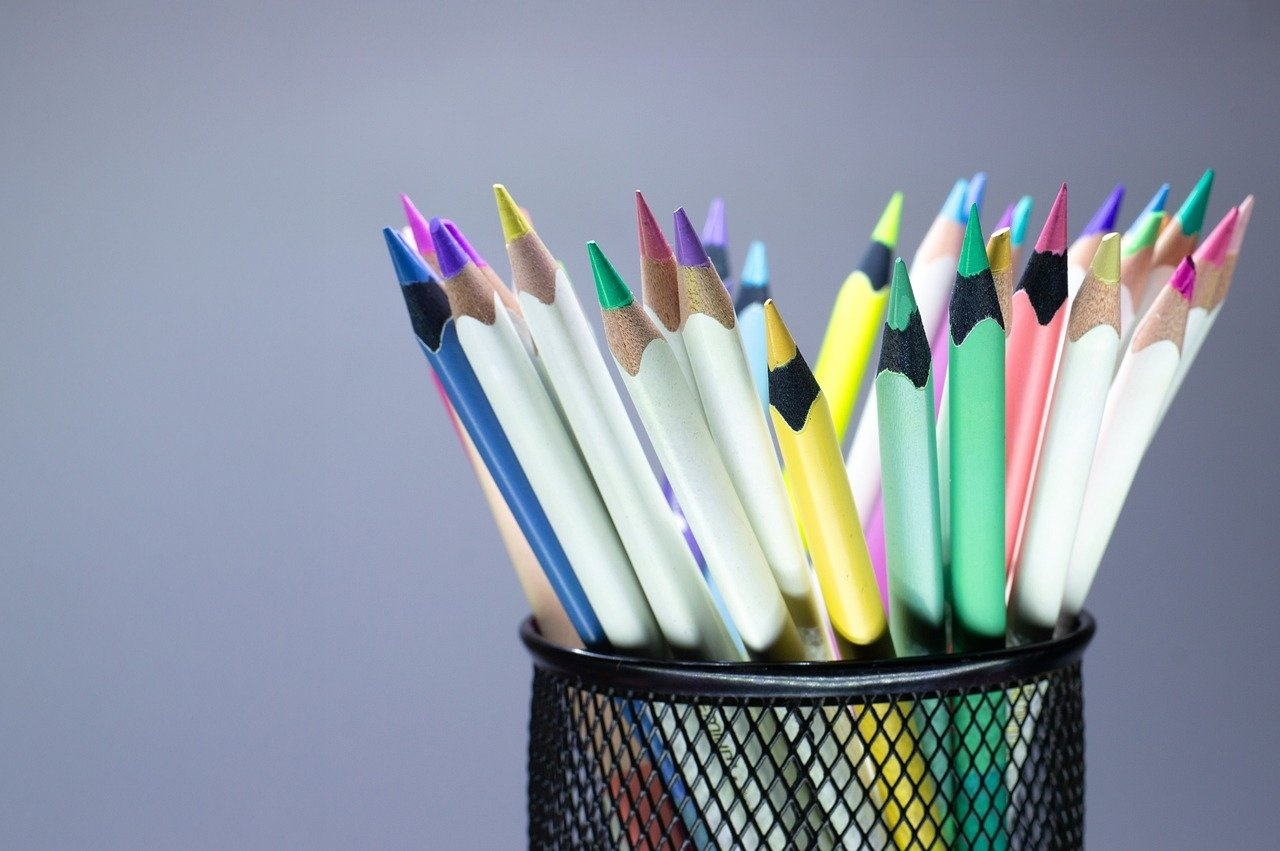

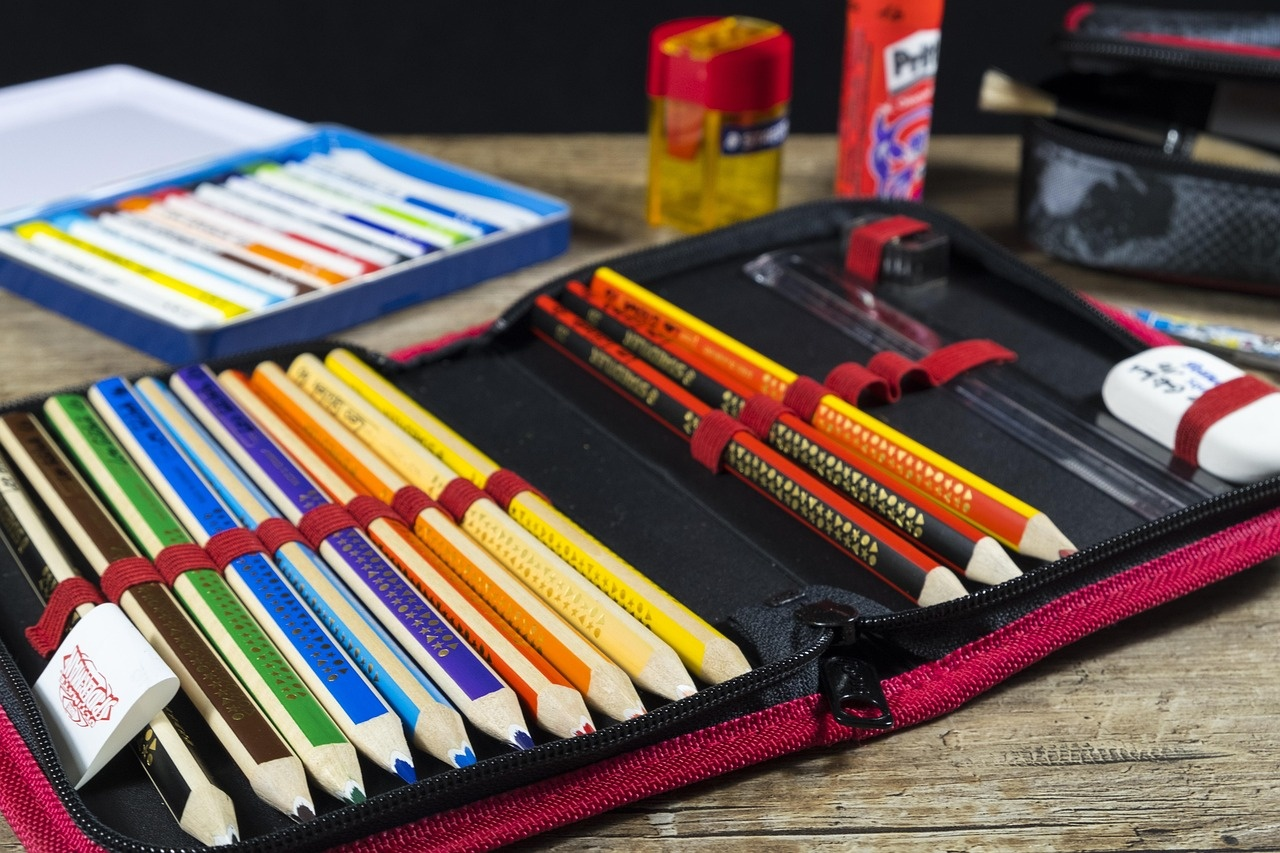

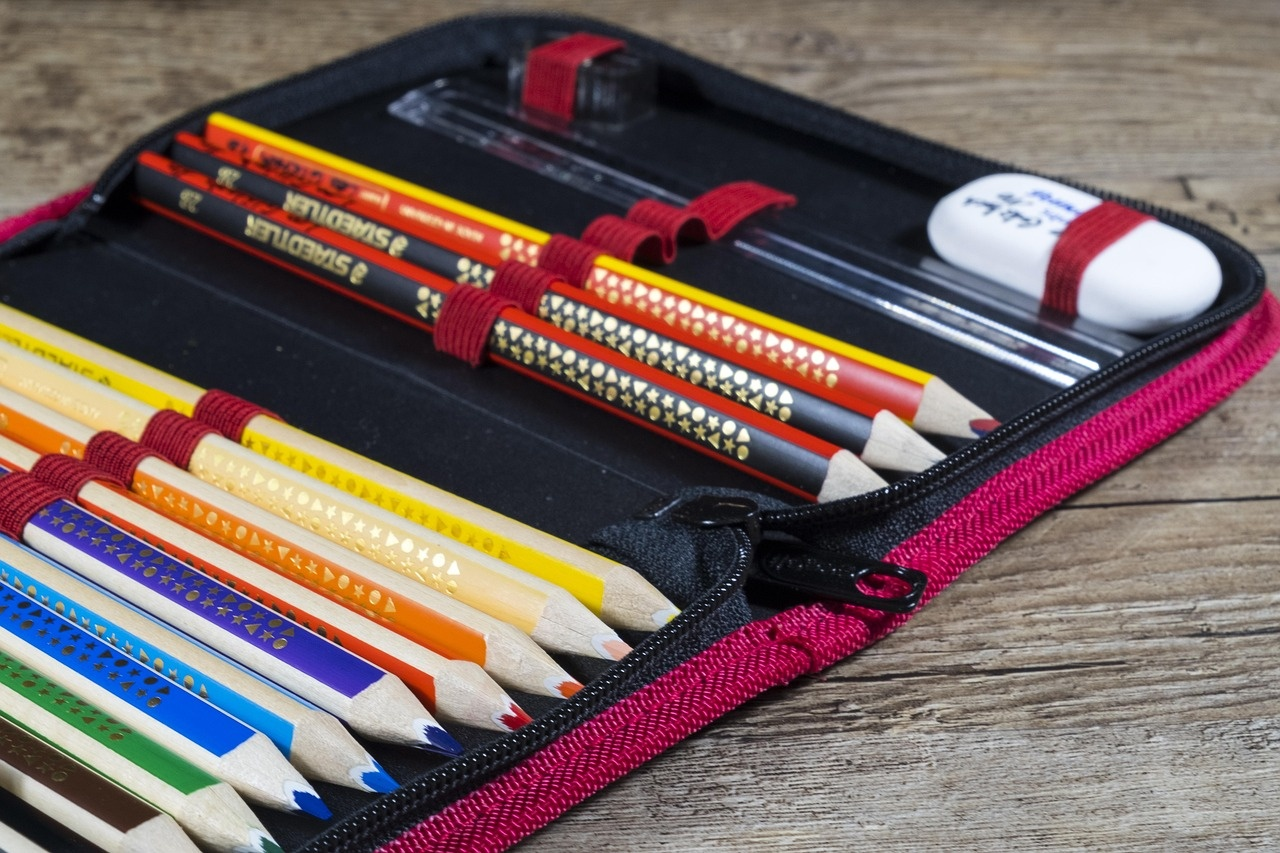


📸 Resultados das Detecções (60 épocas):


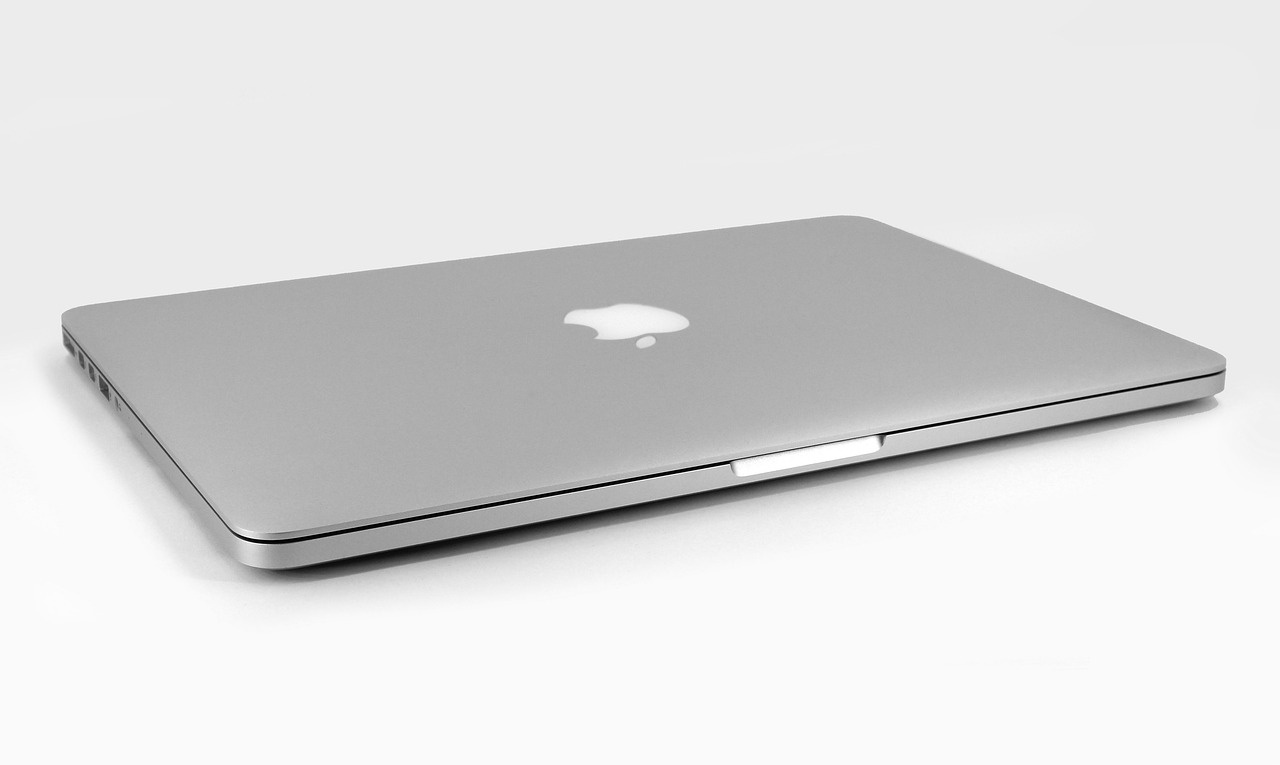

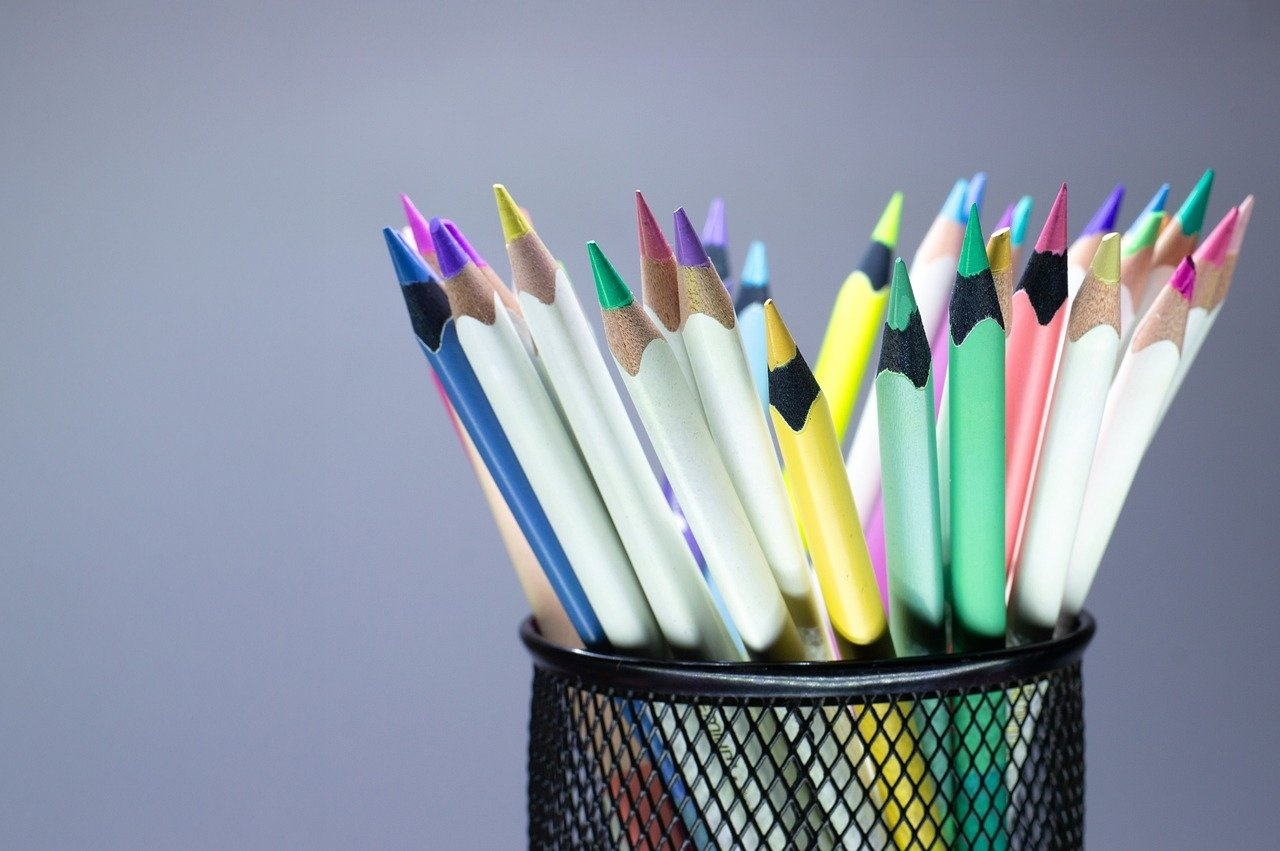

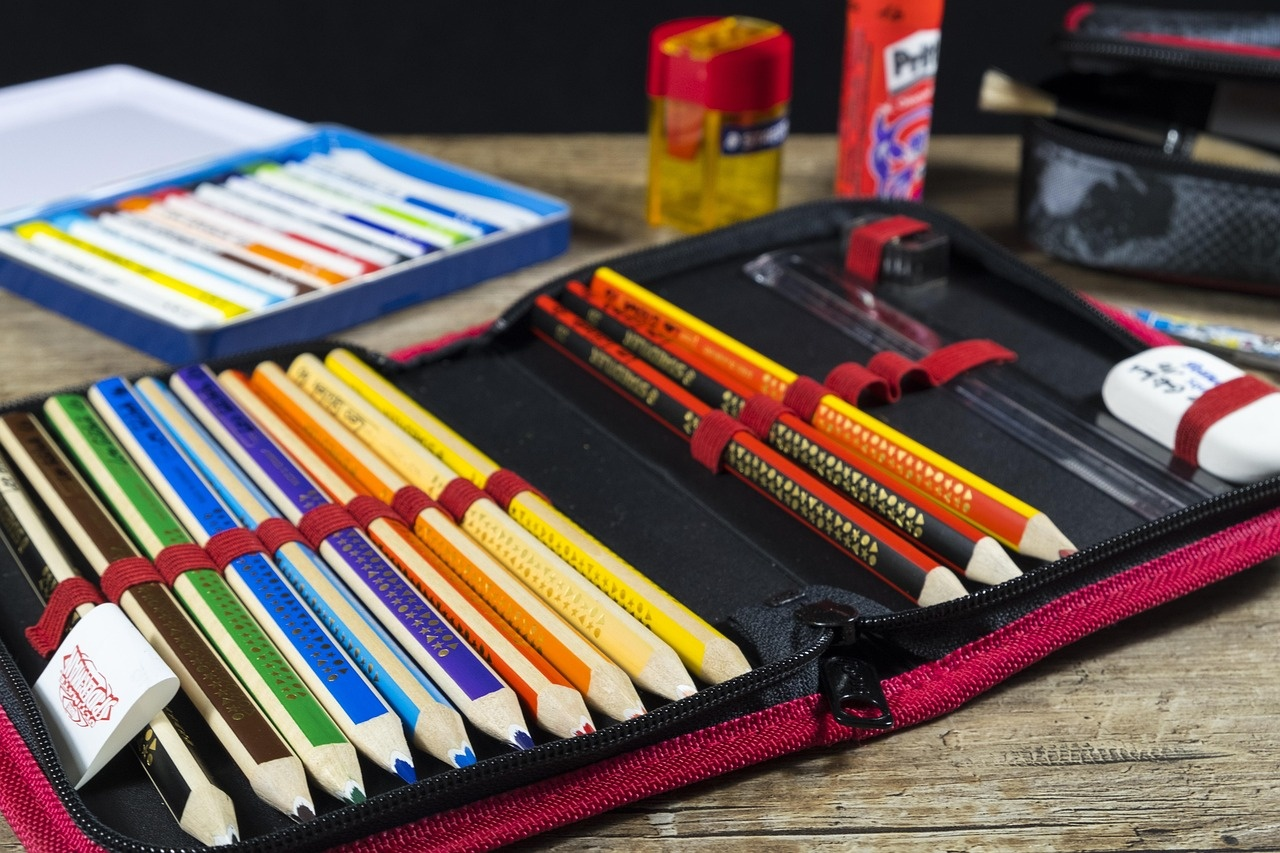

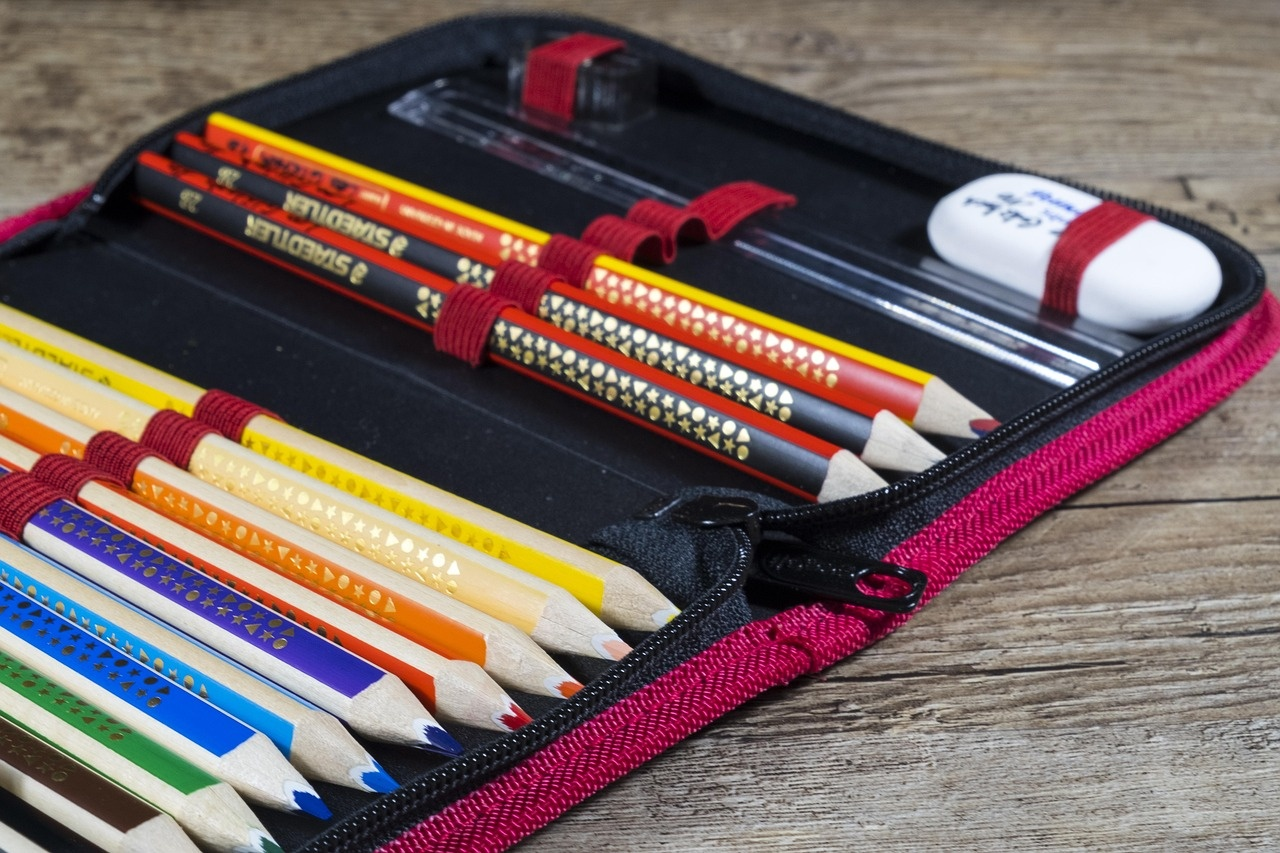

In [8]:
# ---
#
# ## 6. Testes e Inferência
#
# Realizar detecções nas imagens de teste para avaliar o desempenho prático dos modelos.

# Teste com modelo de 30 épocas
print("🎯 Testando modelo de 30 épocas...")
!python detect.py \
    --weights {dataset_path}/runs/train/exp_30epochs/weights/best.pt \
    --img 640 \
    --conf 0.25 \
    --source {dataset_path}/dataset/test/images \
    --name test_30epochs \
    --project {dataset_path}/runs/detect \
    --save-txt \
    --save-conf

# Teste com modelo de 60 épocas
print("\n🎯 Testando modelo de 60 épocas...")
!python detect.py \
    --weights {dataset_path}/runs/train/exp_60epochs/weights/best.pt \
    --img 640 \
    --conf 0.25 \
    --source {dataset_path}/dataset/test/images \
    --name test_60epochs \
    --project {dataset_path}/runs/detect \
    --save-txt \
    --save-conf

print("\n✅ Testes concluídos!")

# Visualizar resultados dos testes
import glob
from IPython.display import Image as IPImage

print("\n📸 Resultados das Detecções (30 épocas):")
test_images_30 = glob.glob(f'{dataset_path}/runs/detect/test_30epochs/*.jpg')
for img in test_images_30[:4]:  # Mostrar primeiras 4 imagens
    display(IPImage(filename=img, width=600))

print("\n📸 Resultados das Detecções (60 épocas):")
test_images_60 = glob.glob(f'{dataset_path}/runs/detect/test_60epochs/*.jpg')
for img in test_images_60[:4]:  # Mostrar primeiras 4 imagens
    display(IPImage(filename=img, width=600))


📊 Comparação de Métricas:
              30 Épocas  60 Épocas
mAP@0.5        0.616590   0.860210
mAP@0.5:0.95   0.350590   0.456080
Precision      0.421610   0.576840
Recall         0.718330   0.969420
Box Loss       0.047060   0.036125
Obj Loss       0.020855   0.016648
Cls Loss       0.016697   0.005476

📈 Diferença Percentual:
mAP@0.5         39.51
mAP@0.5:0.95    30.09
Precision       36.82
Recall          34.95
Box Loss       -23.24
Obj Loss       -20.17
Cls Loss       -67.20
Name: Diferença (%), dtype: float64


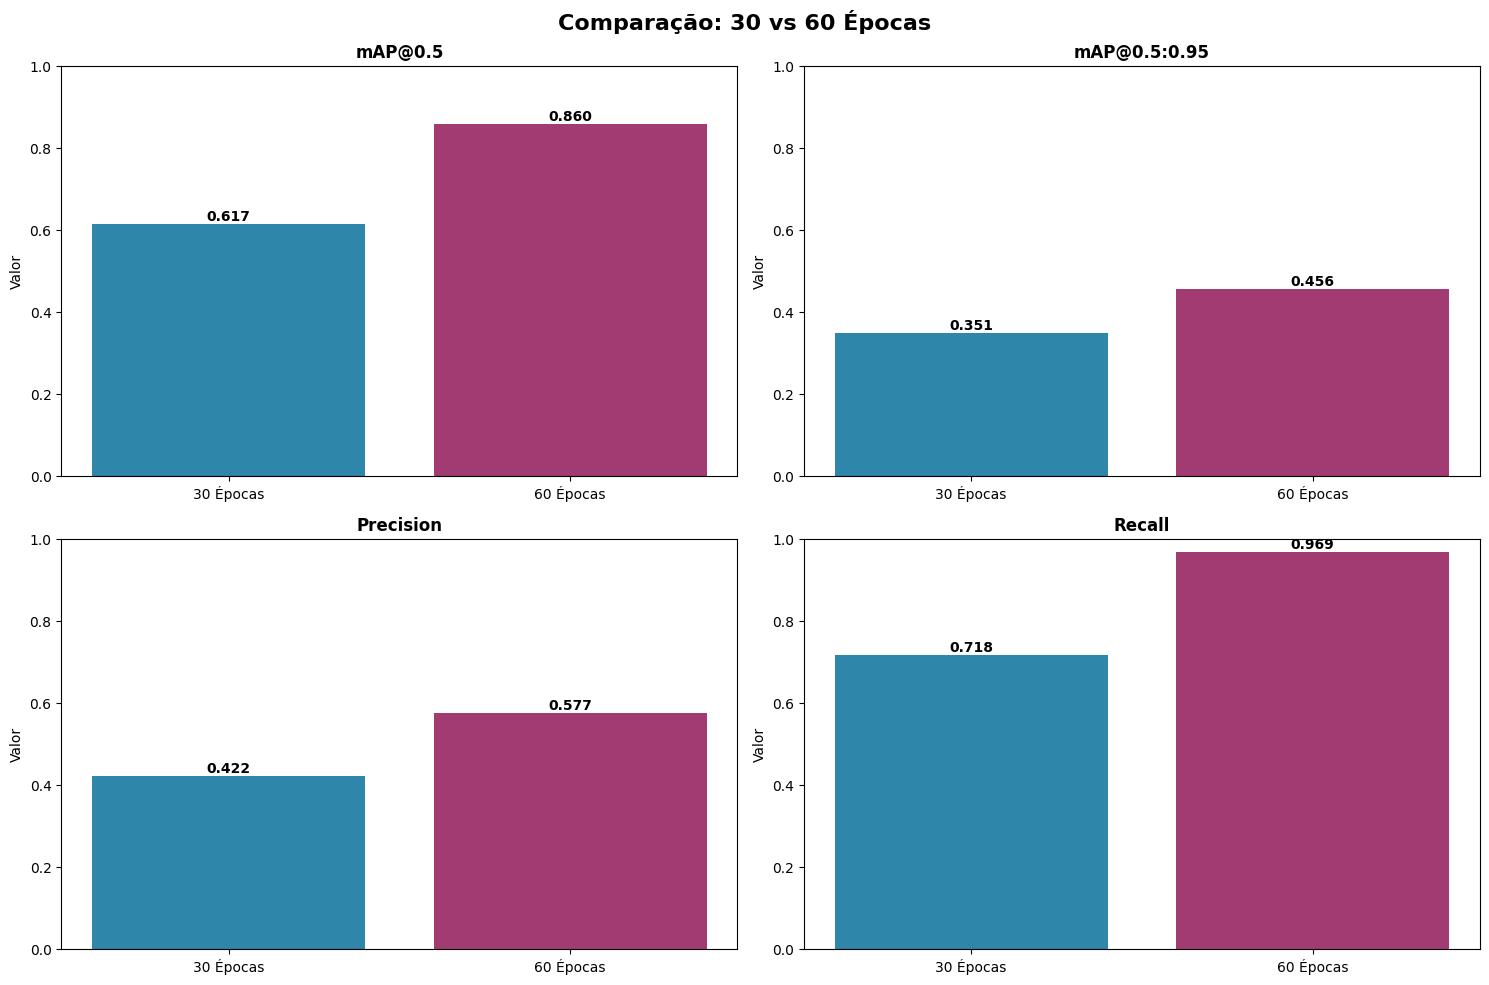


✅ Gráfico comparativo salvo!


In [9]:
# ---
#
# ## 7. Análise Comparativa
#
# ### 7.1 Extração de Métricas

# Função para extrair métricas do results.csv
import pandas as pd

def extrair_metricas(caminho_results):
    """Extrai métricas principais do arquivo results.csv"""
    df = pd.read_csv(caminho_results)
    df.columns = df.columns.str.strip()  # Remover espaços em branco

    # Última época (melhor resultado)
    ultima_epoca = df.iloc[-1]

    metricas = {
        'mAP@0.5': ultima_epoca['metrics/mAP_0.5'],
        'mAP@0.5:0.95': ultima_epoca['metrics/mAP_0.5:0.95'],
        'Precision': ultima_epoca['metrics/precision'],
        'Recall': ultima_epoca['metrics/recall'],
        'Box Loss': ultima_epoca['train/box_loss'],
        'Obj Loss': ultima_epoca['train/obj_loss'],
        'Cls Loss': ultima_epoca['train/cls_loss']
    }

    return metricas

# Extrair métricas dos dois modelos
metricas_30 = extrair_metricas(f'{dataset_path}/runs/train/exp_30epochs/results.csv')
metricas_60 = extrair_metricas(f'{dataset_path}/runs/train/exp_60epochs/results.csv')

# Criar DataFrame comparativo
comparacao = pd.DataFrame({
    '30 Épocas': metricas_30,
    '60 Épocas': metricas_60
})

print("\n📊 Comparação de Métricas:")
print(comparacao)

# Calcular diferença percentual
comparacao['Diferença (%)'] = ((comparacao['60 Épocas'] - comparacao['30 Épocas']) / comparacao['30 Épocas'] * 100).round(2)
print("\n📈 Diferença Percentual:")
print(comparacao['Diferença (%)'])

# ### 7.2 Visualização Comparativa

# Criar gráficos comparativos
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Comparação: 30 vs 60 Épocas', fontsize=16, fontweight='bold')

metricas_plot = ['mAP@0.5', 'mAP@0.5:0.95', 'Precision', 'Recall']
cores = ['#2E86AB', '#A23B72']

for idx, metrica in enumerate(metricas_plot):
    ax = axes[idx // 2, idx % 2]
    valores = [metricas_30[metrica], metricas_60[metrica]]
    barras = ax.bar(['30 Épocas', '60 Épocas'], valores, color=cores)

    ax.set_title(metrica, fontsize=12, fontweight='bold')
    ax.set_ylabel('Valor')
    ax.set_ylim(0, 1.0)

    # Adicionar valores nas barras
    for barra in barras:
        altura = barra.get_height()
        ax.text(barra.get_x() + barra.get_width()/2., altura,
                f'{altura:.3f}',
                ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig(f'{dataset_path}/comparacao_metricas.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Gráfico comparativo salvo!")

In [10]:
# ---
#
# ## 8. Conclusões e Análise Final
#
# ### 8.1 Principais Descobertas

print("\n" + "="*70)
print("🎯 CONCLUSÕES DO PROJETO")
print("="*70)

# Determinar qual modelo teve melhor desempenho
melhor_modelo = "60 épocas" if metricas_60['mAP@0.5'] > metricas_30['mAP@0.5'] else "30 épocas"

print(f"""
📊 RESUMO EXECUTIVO:

1. MODELO VENCEDOR: {melhor_modelo}
   - mAP@0.5: {max(metricas_30['mAP@0.5'], metricas_60['mAP@0.5']):.3f}

2. IMPACTO DO AUMENTO DE ÉPOCAS:
   - Melhoria em mAP@0.5: {comparacao.loc['mAP@0.5', 'Diferença (%)']:.2f}%
   - Melhoria em Precision: {comparacao.loc['Precision', 'Diferença (%)']:.2f}%
   - Melhoria em Recall: {comparacao.loc['Recall', 'Diferença (%)']:.2f}%

3. OBSERVAÇÕES:
   - O modelo {'demonstrou melhoria significativa' if comparacao.loc['mAP@0.5', 'Diferença (%)'] > 5 else 'apresentou melhoria moderada'} com o aumento de épocas
   - {'Recomenda-se uso de 60 épocas para maior acurácia' if melhor_modelo == '60 épocas' else 'O modelo de 30 épocas já apresenta bom desempenho'}
   - Tempo de treinamento: 60 épocas levam aproximadamente 2x mais tempo
""")

# ### 8.2 Pontos Fortes do Trabalho

print("""
✅ PONTOS FORTES:

1. Dataset bem estruturado com divisão adequada (80/10/10)
2. Uso de duas classes bem distintas facilita o aprendizado
3. Comparação entre diferentes configurações de épocas
4. Rotulação precisa usando Make Sense AI
5. Pipeline completo desde o treino até a inferência
6. Documentação clara e reprodutível
""")

# ### 8.3 Limitações e Melhorias Futuras

print("""
⚠️ LIMITAÇÕES IDENTIFICADAS:

1. Dataset relativamente pequeno (80 imagens total)
2. Limitado a apenas 2 classes de objetos
3. Variabilidade de contexto e iluminação pode ser expandida
4. Não foi aplicado data augmentation extensivo

🚀 SUGESTÕES DE MELHORIA:

1. Expandir dataset para 200+ imagens por classe
2. Incluir mais classes de objetos recicláveis
3. Aplicar técnicas de data augmentation (rotação, flip, zoom)
4. Testar outros modelos YOLOv5 (medium, large, xlarge)
5. Implementar sistema de monitoramento em tempo real
6. Otimizar hiperparâmetros (learning rate, batch size)
""")

print("="*70)
print("📝 Relatório completo gerado com sucesso!")
print("="*70)


🎯 CONCLUSÕES DO PROJETO

📊 RESUMO EXECUTIVO:

1. MODELO VENCEDOR: 60 épocas
   - mAP@0.5: 0.860

2. IMPACTO DO AUMENTO DE ÉPOCAS:
   - Melhoria em mAP@0.5: 39.51%
   - Melhoria em Precision: 36.82%
   - Melhoria em Recall: 34.95%

3. OBSERVAÇÕES:
   - O modelo demonstrou melhoria significativa com o aumento de épocas
   - Recomenda-se uso de 60 épocas para maior acurácia
   - Tempo de treinamento: 60 épocas levam aproximadamente 2x mais tempo


✅ PONTOS FORTES:

1. Dataset bem estruturado com divisão adequada (80/10/10)
2. Uso de duas classes bem distintas facilita o aprendizado
3. Comparação entre diferentes configurações de épocas
4. Rotulação precisa usando Make Sense AI
5. Pipeline completo desde o treino até a inferência
6. Documentação clara e reprodutível


⚠️ LIMITAÇÕES IDENTIFICADAS:

1. Dataset relativamente pequeno (80 imagens total)
2. Limitado a apenas 2 classes de objetos
3. Variabilidade de contexto e iluminação pode ser expandida
4. Não foi aplicado data augmentation e